Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [17]:
df=pd.read_csv("Mall_Customers.csv")
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [18]:
df_clean=df.drop('CustomerID', axis=1) #dropping ass its unnecessaring for our predictions
df_clean['Gender'] = df_clean['Gender'].map({'Male':0, 'Female':1}) #label encoding
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_clean) #normalisation

so next to determine optimal number of clusters using elbow method

k=1, WCSS=800.0000000000003
k=2, WCSS=597.9472937932284
k=3, WCSS=494.8037500130456
k=4, WCSS=395.3920903479796
k=5, WCSS=351.7432061711911
k=6, WCSS=277.3897401985192
k=7, WCSS=251.15484911190165
k=8, WCSS=211.98576294959312
k=9, WCSS=185.72807688711433
k=10, WCSS=152.02983429775693


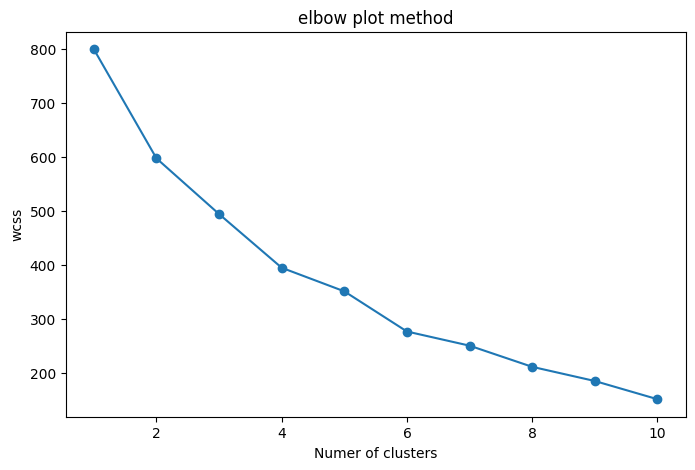

In [28]:
import matplotlib.pyplot as plt

# Assuming you have a cleaned DataFrame named df_clean
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean)

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    print(f"k={k}, WCSS={kmeans.inertia_}")
    wcss.append(kmeans.inertia_)

#plot teeh elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('elbow plot method')
plt.xlabel('Numer of clusters')
plt.ylabel('wcss')
plt.show()

from this elbow point optimal numbr of clusters is k=5 because adding more clusters does not significantly reduce wcsss anymore.

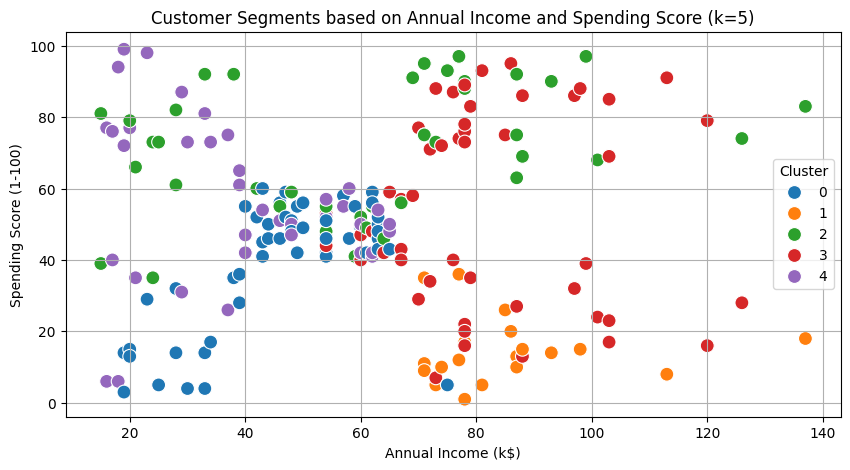

In [38]:
#so applying k=5 kmeans clustering
kmeans=KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# visulaizing using annual income and spending score
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', palette='tab10', s=100)
plt.title('Customer Segments based on Annual Income and Spending Score (k=5)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

model interpretation

Cluster 0: earning less, spending less as well.


cluster 1:Earning high but spending less

cluster 2: earning high as well as spending high

cluster 3: avergae in terms of earning and spending

cluster 4: Earning less but spending more

In [34]:
# Analyze the mean values of features for each cluster
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)


         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         65.333333  56.470588           46.098039               39.313725
1        159.500000  39.500000           85.150000               14.050000
2        100.809524  28.690476           60.904762               70.238095
3        151.510204  37.897959           82.122449               54.448980
4         50.526316  27.315789           38.842105               56.210526


additionally explored

hireracial clustering

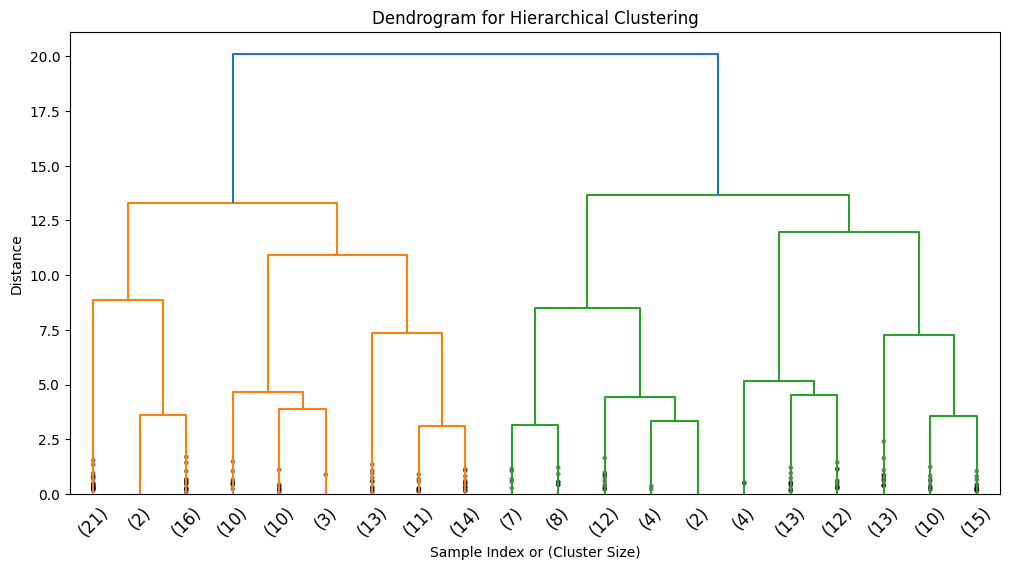

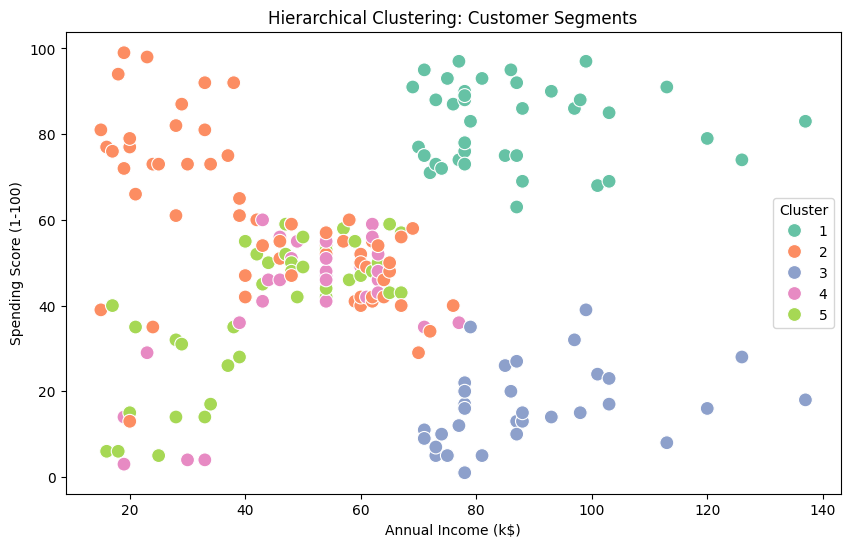

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Cluster_HC,,,,
1,162.000000,32.692308,86.538462,82.128205
2,62.409836,26.147541,43.770492,58.967213
3,166.090909,41.454545,89.090909,16.181818
4,74.758621,56.551724,50.034483,41.344828
5,61.210526,49.789474,44.105263,39.657895


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('Mall_Customers.csv')
df.head()

df_clean = df.drop('CustomerID', axis=1)


df_clean['Gender'] = df_clean['Gender'].map({'Male': 0, 'Female': 1})

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean)

linked = linkage(df_scaled, method='ward')  # Ward minimizes variance within clusters

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=20, leaf_rotation=45., leaf_font_size=12., show_contracted=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.show()
# Form flat clusters with a threshold (say, we choose 5 clusters)
from scipy.cluster.hierarchy import fcluster
df['Cluster_HC'] = fcluster(linked, 5, criterion='maxclust')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster_HC', palette='Set2', data=df, s=100)
plt.title('Hierarchical Clustering: Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()
# Group-wise summary
df.groupby('Cluster_HC').mean(numeric_only=True)



In [39]:
pd.crosstab(df['Cluster'], df['Cluster_HC'])


Cluster_HC,1,2,3,4,5
Cluster,,,,,
0,0,1,1,25,24
1,0,0,18,2,0
2,18,22,0,2,0
3,21,7,14,0,7
4,0,31,0,0,7
